# Linear Regression

## Theory

### Example 1: Giải hệ phương trình tuyến tính



Giải phương trình m = a * x_1 + b * x_2 + c * x_3. Tìm x_1, x_2, x_3?


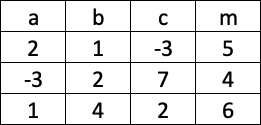

In [2]:
#--------------------------------------------------------------------------------------------------#
# 2 * x_1 + 1 * x_2 + -3 * x_3 = 5
# -3 * x_1 + 2 * x_2 + 7 * x_3 = 4
# 1 * x_1 + 4 * x_2 + 2 * x_3 = 6

# 7x_2 + 6x_3 = 15
# 14x_2 + 13x_3 = 22

# x_3 = -8

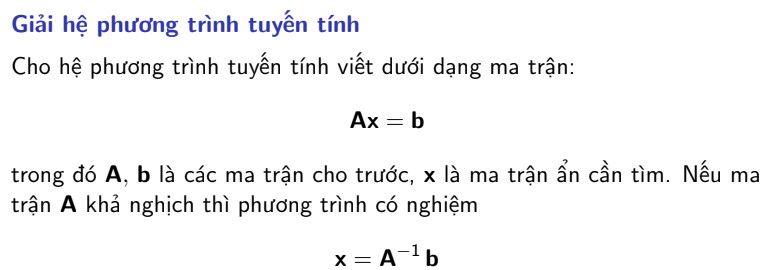

In [3]:
#--------------------------------------------------------------------------------------------------#

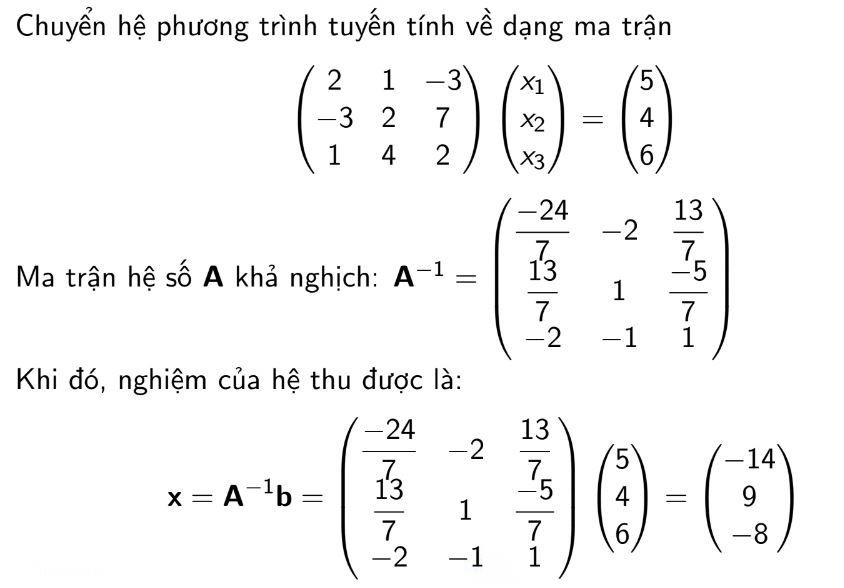

In [4]:
import numpy as np
A = np.array([
    [2, 1, -3],
    [-3, 2, 7],
    [1, 4, 2]
])
b = np.array([
    [5],
    [4],
    [6]
])

A_inv = np.linalg.inv(A)
x = A_inv @ b
x

array([[-14.],
       [  9.],
       [ -8.]])

### Example 2


Giải phương trình m = a * x_1 + b * x_2 + c * x_3. Tìm x_1, x_2, x_3?

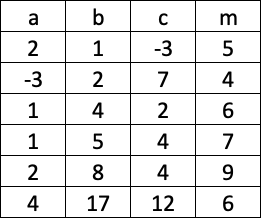

In [ ]:
m_predict = [
    [4],
    [3],
    [6],
    [8],
    [10],
    [5]
]

# minimize (predict - obs)^2

In [7]:
A = np.array([
    [2, 1, -3],
    [-3, 2, 7],
    [1, 4, 2],
    [1, 5, 4],
    [2, 8, 4],
    [4, 17, 12]
])
b = np.array([
    [5],
    [4],
    [6],
    [7],
    [9],
    [6]
])
# array([[3.05718019],
#        [3.30568691],
#        [4.98089846],
#        [1.52812344],
#        [9.96179691],
#        [7.59252115]])

# A_inv = np.linalg.inv(A)
# x = A_inv @ b
# x

#### Define problem
**Need to find**: $x_1, x_2, x_3$

With:

$
f(a, b, c) = a x_1 + b x_2 + c x_3
$


=> Minimize:

$
\sum_{a, b, c}(f(a, b, c) - z(a, b, c))^2
$

#### Hàm mất mát và điểm cực tiểu

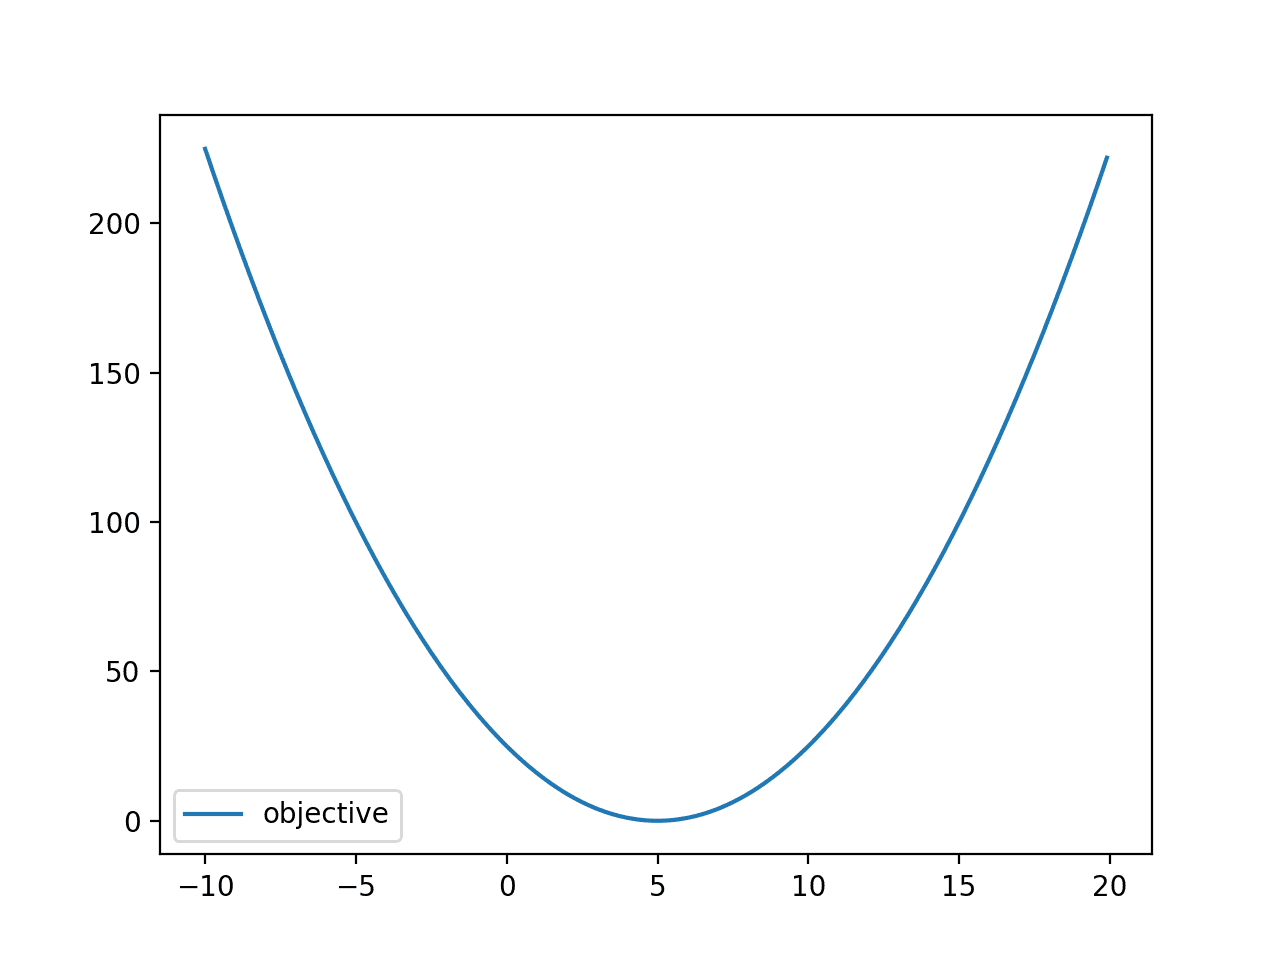

Tìm được nghiệm $x_1, x_2, x_3$ bằng cách lấy đạo hàm của hàm mất mát và giải phương trình đạo hàm bằng 0. Thu được nghiệm:

$$
(B^TB)^{-1}B^Ty
$$

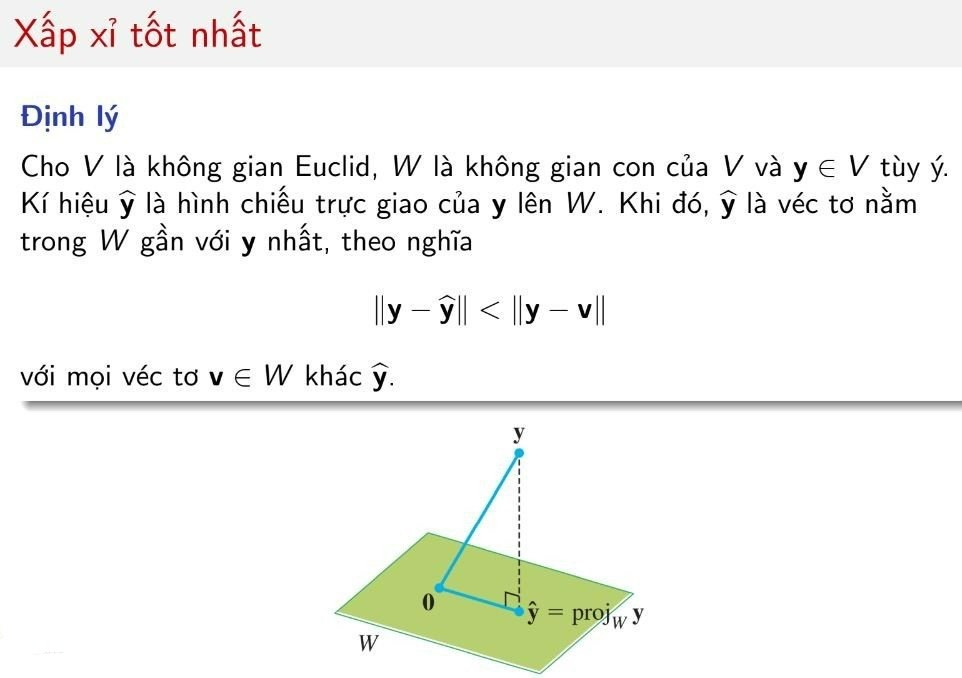

In [ ]:
# x = [(W.T)W]^-1(W.T)y -> y'

In [8]:
# giải bài toán bằng numpy
A = np.array([
    [2, 1, -3],
    [-3, 2, 7],
    [1, 4, 2],
    [1, 5, 4],
    [2, 8, 4],
    [4, 17, 12]
])
b = np.array([
    [5],
    [4],
    [6],
    [7],
    [9],
    [6]
])

A_inv = np.linalg.pinv(A)
x = A_inv @ b
x

array([[-7.84289447],
       [ 5.42552265],
       [-4.43914883]])

In [9]:
b_predict = A @ x
b_predict

array([[3.05718019],
       [3.30568691],
       [4.98089846],
       [1.52812344],
       [9.96179691],
       [7.59252115]])

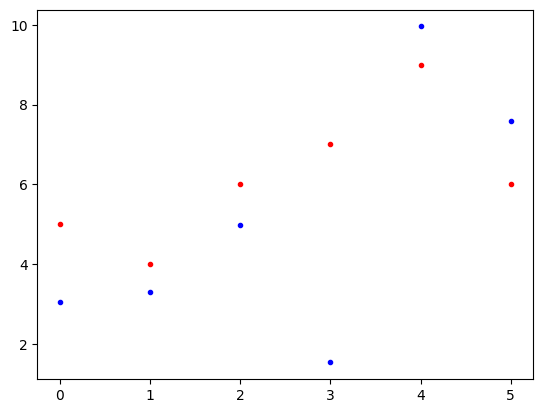

In [10]:
import matplotlib.pyplot as plt
plt.plot(b, '.r')
plt.plot(b_predict, '.b')
plt.show()

In [12]:
# metrics
# rmse
from sklearn.metrics import mean_squared_error
mean_squared_error(b, b_predict, squared=False)
# compare vs mean !!

2.5396127464519602

#### Gradient

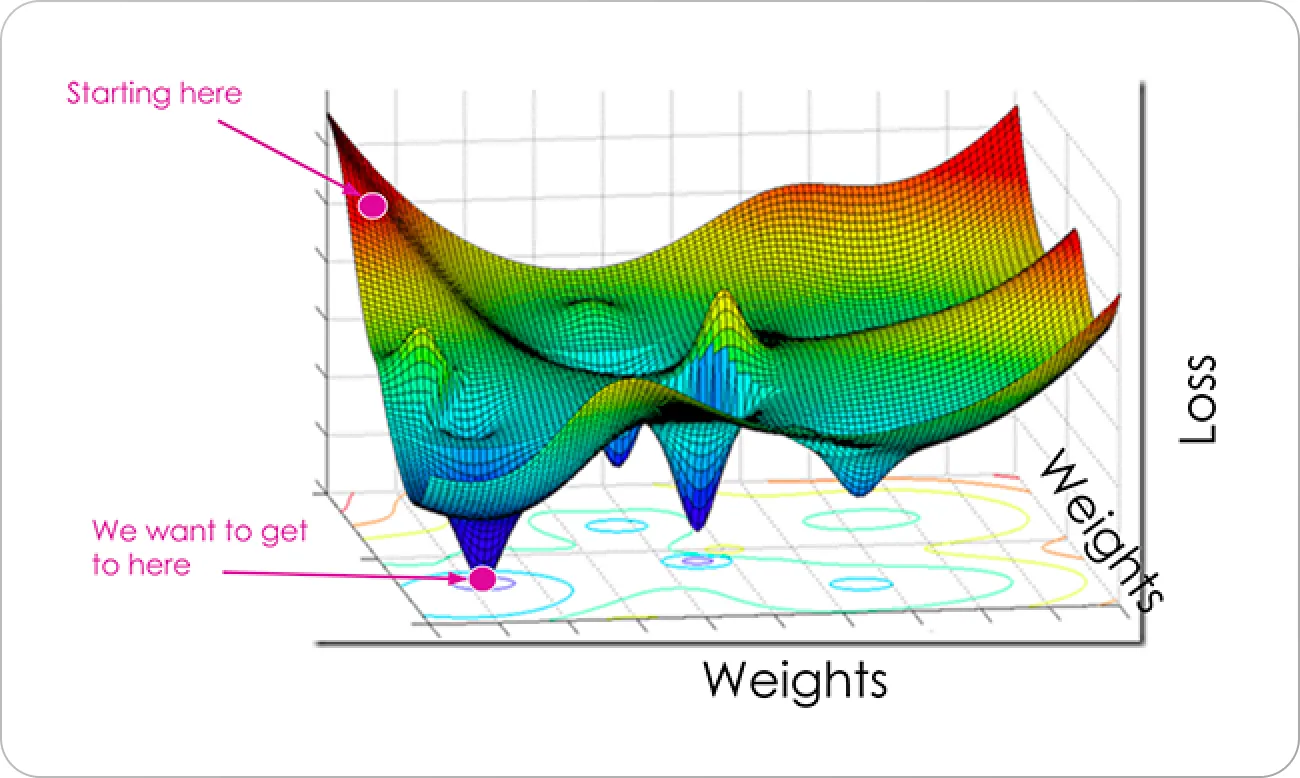

https://www.deeplearning.ai/ai-notes/optimization/index.html

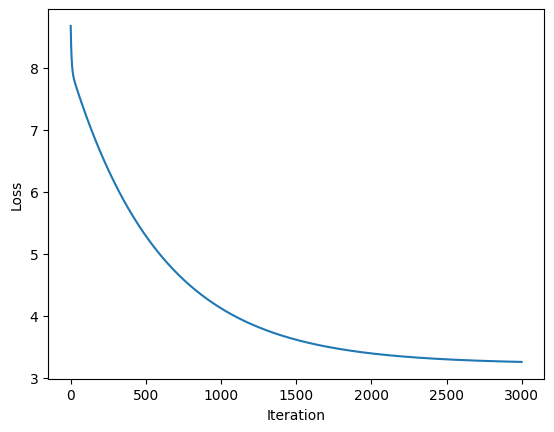

In [13]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([
[2, 1, -3],
[-3, 2, 7],
[1, 4, 2],
[1, 5, 4],
[2, 8, 4],
[4, 17, 12]
])
y = np.array([
[5],
[4],
[6],
[7],
[9],
[6]
])

# Perform batch gradient descent to optimize the parameters
def gradient_descent(x, y, theta, alpha, num_iters):
    m = len(y)
    loss_history = []
    for i in range(num_iters):
        # Compute the gradient
        grad = np.zeros(theta.shape)
        for j in range(m):
            h = np.dot(x[j], theta)
            grad += (h - y[j]) * x[j, :].reshape(-1, 1)
        grad /= m

        # Update the parameters
        theta -= alpha * grad

        # Compute the loss and store the history
        loss = np.sum((np.dot(x, theta) - y)**2) / (2 * m)
        loss_history.append(loss)

    return theta, loss_history

# Run the gradient descent algorithm
theta = np.random.rand(x.shape[1], 1)
alpha = 0.01
num_iters =  3000
theta, loss_history = gradient_descent(x, y, theta, alpha, num_iters)

# Plot the loss function
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
(x.shape[1], 1)

(3, 1)

In [14]:
theta

array([[-7.16499772],
       [ 5.01517671],
       [-4.06391216]])

### Phát biểu bài toán linear regression

# Backtest

In [15]:
# ma: TCB
# mua voi gia mo cua
# ban t+2


# hom nay predict mo cua cua ngay mai
# du doan gia mua cua t+3
# du doan open_t_1
# du doan open_t_3

# F(anh xa thong tin dau vao) de du doan open_t1, open_t3
# thong tin dau vao OHLC V va phai sinh a1, a2, a3, ..., an
# (x1, x2, x3.., xn)
# F_du_doan = x1*a + x2*a2 +...+ xn*an + e

In [16]:
#install
!pip install backtesting
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173804 sha256=1dc5c125dc8ad437dc02cd130e6e9520de222bd7b14156fad2039a1b2bd00861
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.8 MB/s eta 0:00:00


In [18]:
#prepair data
!gdown https://drive.google.com/uc?id=1PukTR0oD53IOiovrV8XncSqkfa2Jj-f3

Downloading...
From: https://drive.google.com/uc?id=1PukTR0oD53IOiovrV8XncSqkfa2Jj-f3
To: /content/tcb_data_feature.csv
100% 1.16M/1.16M [00:00<00:00, 123MB/s]


In [21]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression # ml #
import statsmodels.api as sm
import matplotlib.pyplot as plt
import mplfinance as mplf
import warnings
warnings.filterwarnings('ignore')

In [23]:
data_path = "/content/tcb_data_feature.csv"

In [25]:
tcb_data_feature = pd.read_csv(data_path)
tcb_data_feature = tcb_data_feature.dropna()
tcb_data_feature['TradingDate'] = pd.to_datetime(tcb_data_feature['TradingDate'])
tcb_data_feature.set_index('TradingDate', inplace=True)

In [26]:
tcb_data_feature.tail()

Open   High    Low  Close   Volume  \
TradingDate                                                      
2023-06-14 09:00:00+07:00  33.00  33.45  32.55  32.60  5374800   
2023-06-15 09:00:00+07:00  32.60  32.90  32.40  32.65  3863700   
2023-06-16 09:00:00+07:00  32.65  33.45  32.50  32.55  6928400   
2023-06-19 09:00:00+07:00  32.55  32.55  31.95  32.10  3674300   
2023-06-20 09:00:00+07:00  32.20  32.25  31.95  32.15  2084400   

                           close_open_diff  high_close_diff  low_close_diff  \
TradingDate                                                                   
2023-06-14 09:00:00+07:00            -0.40             0.85           -0.05   
2023-06-15 09:00:00+07:00             0.05             0.25           -0.25   
2023-06-16 09:00:00+07:00            -0.10             0.90           -0.05   
2023-06-19 09:00:00+07:00            -0.45             0.45           -0.15   
2023-06-20 09:00:00+07:00            -0.05             0.10           -0.20   

                           high_open_diff  low_open_diff  ...  \
TradingDate                                               ...   
2023-06-14 09:00:00+07:00            0.45          -0.45  ...   
2023-06-15 09:00:00+07:00            0.30          -0.20  ...   
2023-06-16 09:00:00+07:00            0.80          -0.15  ...   
2023-06-19 09:00:00+07:00            0.00          -0.60  ...   
2023-06-20 09:00:00+07:00            0.05          -0.25  ...   

                           bollinger_lband_20  bollinger_hband_20     ema_12  \
TradingDate                                                                    
2023-06-14 09:00:00+07:00           28.647709           33.547291  31.921735   
2023-06-15 09:00:00+07:00           28.812378           33.687622  32.033775   
2023-06-16 09:00:00+07:00           29.001209           33.783791  32.113195   
2023-06-19 09:00:00+07:00           29.099006           33.845994  32.111165   
2023-06-20 09:00:00+07:00           29.229932           33.895068  32.117139   

                              ema_26  close_t1  close_t2  close_t3  open_t1  \
TradingDate                                                                   
2023-06-14 09:00:00+07:00  31.058135     32.65     32.55     32.10    32.60   
2023-06-15 09:00:00+07:00  31.176051     32.55     32.10     32.15    32.65   
2023-06-16 09:00:00+07:00  31.277825     32.10     32.15     32.50    32.55   
2023-06-19 09:00:00+07:00  31.338727     32.15     32.50     32.60    32.20   
2023-06-20 09:00:00+07:00  31.398821     32.50     32.60     32.90    32.15   

                           open_t2  open_t3  
TradingDate                                  
2023-06-14 09:00:00+07:00    32.65    32.55  
2023-06-15 09:00:00+07:00    32.55    32.20  
2023-06-16 09:00:00+07:00    32.20    32.15  
2023-06-19 09:00:00+07:00    32.15    32.90  
2023-06-20 09:00:00+07:00    32.90    32.65  

[5 rows x 67 columns]

In [28]:
# process data
tcb_data_feature['origin_Open'] = tcb_data_feature['Open']
tcb_data_feature['origin_High'] = tcb_data_feature['High']
tcb_data_feature['origin_Low'] = tcb_data_feature['Low']
tcb_data_feature['origin_Close'] = tcb_data_feature['Close']
tcb_data_feature['Open'] = tcb_data_feature['Open']
tcb_data_feature['High'] = tcb_data_feature['High']
tcb_data_feature['Low'] = tcb_data_feature['Low']
tcb_data_feature['Close'] = tcb_data_feature['Close']



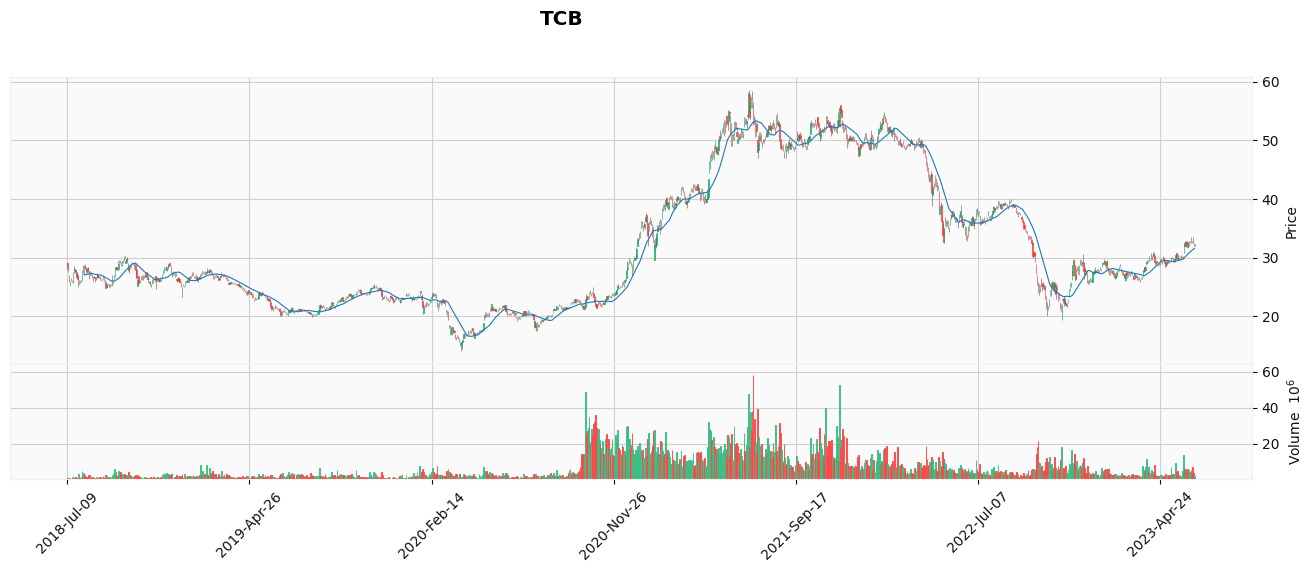

In [29]:
import mplfinance as mplf


mplf.plot(tcb_data_feature,figratio=(60,20),
          title='TCB',
          type='candle',
          mav=(20),volume=True,
          style="yahoo")
mplf.show()

In [30]:
tcb_data_feature_train = tcb_data_feature[:'2022-01-01']
tcb_data_feature_validate = tcb_data_feature['2022-01-01':]

In [32]:
print(tcb_data_feature_train.shape)
print(tcb_data_feature_validate.shape)

(876, 71)
(363, 71)


In [33]:
tcb_data_feature.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'close_open_diff',
       'high_close_diff', 'low_close_diff', 'high_open_diff', 'low_open_diff',
       'high_low_diff', 'open_diff_pct_p1', 'open_diff_pct_p2',
       'open_diff_pct_p3', 'open_diff_pct_p4', 'open_diff_pct_p5',
       'open_diff_pct_p7', 'close_p1', 'close_p2', 'close_p3', 'close_p4',
       'close_p5', 'close_p7', 'close_diff_p1', 'close_diff_p2',
       'close_diff_p3', 'close_diff_p4', 'close_diff_p5', 'close_diff_p7',
       'close_diff_pct_p1', 'close_diff_pct_p2', 'close_diff_pct_p3',
       'close_diff_pct_p4', 'close_diff_pct_p5', 'close_diff_pct_p7',
       'volume_p1', 'volume_p2', 'volume_p3', 'volume_p4', 'volume_p5',
       'volume_p7', 'volume_diff_p1', 'volume_diff_p2', 'volume_diff_p3',
       'volume_diff_p4', 'volume_diff_p5', 'volume_diff_p7',
       'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p4', 'volume_diff_pct_p5', 'volume_diff_pct_p7',
       'on_bal

In [34]:
#train
X_train = tcb_data_feature_train[['close_open_diff',
       'high_close_diff', 'low_close_diff', 'high_open_diff', 'low_open_diff',
       'high_low_diff', 'open_diff_pct_p1', 'open_diff_pct_p2',
       'open_diff_pct_p3', 'open_diff_pct_p4', 'open_diff_pct_p5',
       'open_diff_pct_p7', 'close_p1', 'close_p2', 'close_p3', 'close_p4',
       'close_p5', 'close_p7', 'close_diff_p1', 'close_diff_p2',
       'close_diff_p3', 'close_diff_p4', 'close_diff_p5', 'close_diff_p7',
       'close_diff_pct_p1', 'close_diff_pct_p2', 'close_diff_pct_p3',
       'close_diff_pct_p4', 'close_diff_pct_p5', 'close_diff_pct_p7',
       'volume_p1', 'volume_p2', 'volume_p3', 'volume_p4', 'volume_p5',
       'volume_p7', 'volume_diff_p1', 'volume_diff_p2', 'volume_diff_p3',
       'volume_diff_p4', 'volume_diff_p5', 'volume_diff_p7',
       'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p4', 'volume_diff_pct_p5', 'volume_diff_pct_p7',
       'on_balance_volume', 'rsi_window_14', 'rsi_window_7',
       'bollinger_mavg_20', 'bollinger_lband_20', 'bollinger_hband_20',
       'ema_12', 'ema_26', 'origin_Open', 'origin_High', 'origin_Low',
       'origin_Close']]
y_open_t1_train = tcb_data_feature_train['open_t1']
y_open_t3_train = tcb_data_feature_train['open_t3']

In [35]:
#validate
X_validate = tcb_data_feature_validate[['close_open_diff',
       'high_close_diff', 'low_close_diff', 'high_open_diff', 'low_open_diff',
       'high_low_diff', 'open_diff_pct_p1', 'open_diff_pct_p2',
       'open_diff_pct_p3', 'open_diff_pct_p4', 'open_diff_pct_p5',
       'open_diff_pct_p7', 'close_p1', 'close_p2', 'close_p3', 'close_p4',
       'close_p5', 'close_p7', 'close_diff_p1', 'close_diff_p2',
       'close_diff_p3', 'close_diff_p4', 'close_diff_p5', 'close_diff_p7',
       'close_diff_pct_p1', 'close_diff_pct_p2', 'close_diff_pct_p3',
       'close_diff_pct_p4', 'close_diff_pct_p5', 'close_diff_pct_p7',
       'volume_p1', 'volume_p2', 'volume_p3', 'volume_p4', 'volume_p5',
       'volume_p7', 'volume_diff_p1', 'volume_diff_p2', 'volume_diff_p3',
       'volume_diff_p4', 'volume_diff_p5', 'volume_diff_p7',
       'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p4', 'volume_diff_pct_p5', 'volume_diff_pct_p7',
       'on_balance_volume', 'rsi_window_14', 'rsi_window_7',
       'bollinger_mavg_20', 'bollinger_lband_20', 'bollinger_hband_20',
       'ema_12', 'ema_26', 'origin_Open', 'origin_High', 'origin_Low',
       'origin_Close']]
y_open_t1_validate = tcb_data_feature_validate['open_t1']
y_open_t3_validate = tcb_data_feature_validate['open_t3']

In [37]:
reg_t1 = LinearRegression().fit(X_train, y_open_t1_train)
reg_t3 = LinearRegression().fit(X_train, y_open_t3_train)

In [38]:
#train
tcb_data_feature_train['open_t1_predict'] = reg_t1.predict(X_train)
tcb_data_feature_train['open_t3_predict'] = reg_t3.predict(X_train)
# validate
tcb_data_feature_validate['open_t1_predict'] = reg_t1.predict(X_validate)
tcb_data_feature_validate['open_t3_predict'] = reg_t3.predict(X_validate)
max_validate_len = tcb_data_feature_validate.shape[0]

In [40]:
tcb_data_feature_validate['open_t1_predict']

TradingDate
2022-01-04 09:00:00+07:00    51.063700
2022-01-05 09:00:00+07:00    50.603906
2022-01-06 09:00:00+07:00    49.954742
2022-01-07 09:00:00+07:00    49.603193
2022-01-10 09:00:00+07:00    49.017125
                               ...    
2023-06-14 09:00:00+07:00    32.629377
2023-06-15 09:00:00+07:00    32.850508
2023-06-16 09:00:00+07:00    32.637118
2023-06-19 09:00:00+07:00    32.193644
2023-06-20 09:00:00+07:00    32.338508
Name: open_t1_predict, Length: 363, dtype: float64

In [42]:
# metrics
from sklearn.metrics import mean_squared_error
# mean_squared_error
print('rmse predict open t1')
print(mean_squared_error(tcb_data_feature_train['open_t1_predict'], tcb_data_feature_train['open_t1'], squared=False))
print(mean_squared_error(tcb_data_feature_validate['open_t1_predict'][0:max_validate_len-1], tcb_data_feature_validate['open_t1'][0:max_validate_len-1], squared=False))


rmse predict open t1
0.29455877157856547
0.34131012227364155


In [43]:
tcb_data_feature_validate['open_t3_predict']

TradingDate
2022-01-04 09:00:00+07:00    51.172614
2022-01-05 09:00:00+07:00    50.748998
2022-01-06 09:00:00+07:00    50.047961
2022-01-07 09:00:00+07:00    49.679540
2022-01-10 09:00:00+07:00    49.027199
                               ...    
2023-06-14 09:00:00+07:00    33.733328
2023-06-15 09:00:00+07:00    33.696567
2023-06-16 09:00:00+07:00    33.762615
2023-06-19 09:00:00+07:00    33.138845
2023-06-20 09:00:00+07:00    33.226944
Name: open_t3_predict, Length: 363, dtype: float64

In [45]:
print('rmse predict open t3')
print(mean_squared_error(tcb_data_feature_train['open_t3_predict'], tcb_data_feature_train['open_t3'], squared=False))
print(mean_squared_error(tcb_data_feature_validate['open_t3_predict'][0:max_validate_len-3], tcb_data_feature_validate['open_t3'][0:max_validate_len-3], squared=False))

rmse predict open t3
0.9783651475211889
1.5348963295869689


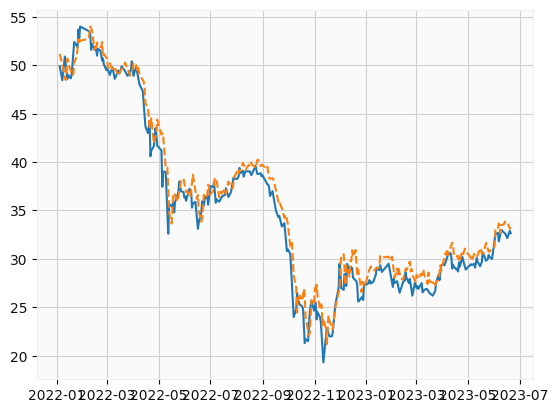

In [47]:
plt.plot(tcb_data_feature_validate['open_t3'], '-')
plt.plot(tcb_data_feature_validate['open_t3_predict'], '--')
plt.show()

In [56]:
from backtesting import Backtest
from backtesting import Strategy
from backtesting.lib import crossover
import math

class MyStrategy(Strategy):
    thresh_hold = 0.021

    # Do as much initial computation as possible
    def init(self):
      # tu viet
      self.indicator = self.I(lambda x: x, self.data.open_t3_predict/self.data.open_t1_predict - 1, name='indicator')

    def next(self):
      # self.indicator[-1]
      if self.data.open_t3_predict[-1]/self.data.open_t1_predict[-1] - 1 > self.thresh_hold: #buy
            self.buy() # mua mo cua
      if len(self.trades) != 0:
        for trade in self.trades:
          if self.data.index[-2] >= trade.entry_time:
            trade.close() # ban mo cua

In [53]:
bt_train = Backtest(tcb_data_feature_train, MyStrategy, cash=20_000_000, commission=0.005)
optim = bt_train.optimize(
    thresh_hold = list(np.arange(0.0, 0.07, 0.001)), #hyperparameter
    maximize = 'Win Rate [%]',
)

bt_train.plot()

Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

Row(id='2239', ...)

In [54]:
optim

Start                     2018-07-09 07:00...
End                       2021-12-31 09:00...
Duration                   1271 days 02:00:00
Exposure Time [%]                    5.821918
Equity Final [$]                32119861.6375
Equity Peak [$]                 33496426.3375
Return [%]                          60.599308
Buy & Hold Return [%]               75.438596
Return (Ann.) [%]                   14.600506
Volatility (Ann.) [%]               12.142322
Sharpe Ratio                         1.202448
Sortino Ratio                        3.287305
Calmar Ratio                         1.538727
Max. Drawdown [%]                   -9.488695
Avg. Drawdown [%]                    -2.10649
Max. Drawdown Duration      162 days 00:00:00
Avg. Drawdown Duration       38 days 00:00:00
# Trades                                   18
Win Rate [%]                        88.888889
Best Trade [%]                       12.99435
Worst Trade [%]                     -9.488701
Avg. Trade [%]                    

In [55]:
optim['_strategy']

<Strategy MyStrategy(thresh_hold=0.021)>

In [57]:
bt_validate = Backtest(tcb_data_feature_validate, MyStrategy, cash=20_000_000, commission=0.005)
stats = bt_validate.run()
bt_validate.plot()

Row(id='3021', ...)

In [58]:
stats

Start                     2022-01-04 09:00...
End                       2023-06-20 09:00...
Duration                    532 days 00:00:00
Exposure Time [%]                   63.911846
Equity Final [$]                 11000015.408
Equity Peak [$]                   20415165.52
Return [%]                         -44.999923
Buy & Hold Return [%]              -36.836935
Return (Ann.) [%]                  -34.043374
Volatility (Ann.) [%]               23.203473
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -52.973321
Avg. Drawdown [%]                  -52.973321
Max. Drawdown Duration      412 days 00:00:00
Avg. Drawdown Duration      412 days 00:00:00
# Trades                                  108
Win Rate [%]                        47.222222
Best Trade [%]                      17.804759
Worst Trade [%]                    -15.830683
Avg. Trade [%]                    

In [59]:
stats['_trades']

Size  EntryBar  ExitBar  EntryPrice  ExitPrice           PnL  \
0    490160        74       76    40.80300      41.65  4.151655e+05   
1    474062        79       81    43.06425      41.20 -8.837701e+05   
2    471704        81       83    41.40600      39.00 -1.134920e+06   
3    504268        85       87    36.48150      32.60 -1.957316e+06   
4    501759        87       89    32.76300      35.40  1.323138e+06   
..      ...       ...      ...         ...        ...           ...   
103  344261       352      354    32.05950      32.70  2.204992e+05   
104  352243       355      357    31.95900      32.70  2.610121e+05   
105  347304       358      360    33.16500      32.65 -1.788616e+05   
106  345576       360      362    32.81325      32.20 -2.119245e+05   
107  343857       362      362    32.36100      32.20 -5.536098e+04   

     ReturnPct                 EntryTime                  ExitTime Duration  
0     0.020758 2022-04-26 09:00:00+07:00 2022-04-28 09:00:00+07:00   2 days  
1    -0.043290 2022-05-05 09:00:00+07:00 2022-05-09 09:00:00+07:00   4 days  
2    -0.058108 2022-05-09 09:00:00+07:00 2022-05-11 09:00:00+07:00   2 days  
3    -0.106396 2022-05-13 09:00:00+07:00 2022-05-17 09:00:00+07:00   4 days  
4     0.080487 2022-05-17 09:00:00+07:00 2022-05-19 09:00:00+07:00   2 days  
..         ...                       ...                       ...      ...  
103   0.019978 2023-06-06 09:00:00+07:00 2023-06-08 09:00:00+07:00   2 days  
104   0.023186 2023-06-09 09:00:00+07:00 2023-06-13 09:00:00+07:00   4 days  
105  -0.015528 2023-06-14 09:00:00+07:00 2023-06-16 09:00:00+07:00   2 days  
106  -0.018689 2023-06-16 09:00:00+07:00 2023-06-20 09:00:00+07:00   4 days  
107  -0.004975 2023-06-20 09:00:00+07:00 2023-06-20 09:00:00+07:00   0 days  

[108 rows x 10 columns]

In [60]:
reg_t1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['close_open_diff', 'high_close_diff', 'low_close_diff',
        'high_open_diff', 'low_open_diff', 'high_low_diff',
        'open_diff_pct_p1', 'open_diff_pct_p2', 'open_diff_pct_p3',
        'open_diff_pct_p4', 'open_diff_pct_p5', 'open_diff_pct_p7',
        'close_p1', 'close_p2', 'close_p3', 'close_p4', 'close_p5',
        'close_p7', 'close_diff_p1', 'close_diff_p2', 'close_diff_p3',
        'close_diff_p4', 'close_diff_p5', 'close_diff_p7',
        'close_diff_pct_p1', 'close_diff_pct_p2', 'close_diff_pct_p3',
        'close_diff_pct_p4', 'close_diff_pct_p5', 'close_diff_pct_p7',
        'volume_p1', 'volume_p2', 'volume_p3', 'volume_p4', 'volume_p5',
        'volume_p7', 'volume_diff_p1', 'volume_diff_p2', 'volume_diff_p3',
        'volume_diff_p4', 'volume_diff_p5', 'volume_diff_p7',
        'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
        'volume_d

In [ ]:
reg_t1.coef_.argmax()

24

In [ ]:
reg_t1.feature_names_in_[19]

'close_diff_p2'

In [ ]:
reg_t1.coef_[19]

0.05767929607576863

In [ ]:
tcb_data_feature_validate['indicator'] = tcb_data_feature_validate['open_t3_predict']/tcb_data_feature_validate['open_t1_predict'] -1 > 0.014

In [ ]:
tcb_data_feature_validate

Open   High    Low  Close    Volume  \
2022-01-04 09:00:00+07:00  50.50  51.20  50.30  50.90  11334600   
2022-01-05 09:00:00+07:00  50.90  51.20  50.30  50.50   9569600   
2022-01-06 09:00:00+07:00  50.20  50.40  49.60  49.90  10716400   
2022-01-07 09:00:00+07:00  49.90  50.10  49.40  49.45   7832200   
2022-01-10 09:00:00+07:00  49.50  49.60  48.95  48.95   7180200   
...                          ...    ...    ...    ...       ...   
2023-06-14 09:00:00+07:00  33.00  33.45  32.55  32.60   5374800   
2023-06-15 09:00:00+07:00  32.60  32.90  32.40  32.65   3863700   
2023-06-16 09:00:00+07:00  32.65  33.45  32.50  32.55   6928400   
2023-06-19 09:00:00+07:00  32.55  32.55  31.95  32.10   3674300   
2023-06-20 09:00:00+07:00  32.20  32.25  31.95  32.15   2084400   

                           close_open_diff  high_close_diff  low_close_diff  \
2022-01-04 09:00:00+07:00             0.40             0.30           -0.60   
2022-01-05 09:00:00+07:00            -0.40             0.70           -0.20   
2022-01-06 09:00:00+07:00            -0.30             0.50           -0.30   
2022-01-07 09:00:00+07:00            -0.45             0.65           -0.05   
2022-01-10 09:00:00+07:00            -0.55             0.65            0.00   
...                                    ...              ...             ...   
2023-06-14 09:00:00+07:00            -0.40             0.85           -0.05   
2023-06-15 09:00:00+07:00             0.05             0.25           -0.25   
2023-06-16 09:00:00+07:00            -0.10             0.90           -0.05   
2023-06-19 09:00:00+07:00            -0.45             0.45           -0.15   
2023-06-20 09:00:00+07:00            -0.05             0.10           -0.20   

                           high_open_diff  low_open_diff  ...  open_t1  \
2022-01-04 09:00:00+07:00            0.70          -0.20  ...    50.90   
2022-01-05 09:00:00+07:00            0.30          -0.60  ...    50.20   
2022-01-06 09:00:00+07:00            0.20          -0.60  ...    49.90   
2022-01-07 09:00:00+07:00            0.20          -0.50  ...    49.50   
2022-01-10 09:00:00+07:00            0.10          -0.55  ...    48.90   
...                                   ...            ...  ...      ...   
2023-06-14 09:00:00+07:00            0.45          -0.45  ...    32.60   
2023-06-15 09:00:00+07:00            0.30          -0.20  ...    32.65   
2023-06-16 09:00:00+07:00            0.80          -0.15  ...    32.55   
2023-06-19 09:00:00+07:00            0.00          -0.60  ...    32.20   
2023-06-20 09:00:00+07:00            0.05          -0.25  ...    32.15   

                           open_t2  open_t3  origin_Open  origin_High  \
2022-01-04 09:00:00+07:00    50.20    49.90        50.50        51.20   
2022-01-05 09:00:00+07:00    49.90    49.50        50.90        51.20   
2022-01-06 09:00:00+07:00    49.50    48.90        50.20        50.40   
2022-01-07 09:00:00+07:00    48.90    48.45        49.90        50.10   
2022-01-10 09:00:00+07:00    48.45    50.90        49.50        49.60   
...                            ...      ...          ...          ...   
2023-06-14 09:00:00+07:00    32.65    32.55        33.00        33.45   
2023-06-15 09:00:00+07:00    32.55    32.20        32.60        32.90   
2023-06-16 09:00:00+07:00    32.20    32.15        32.65        33.45   
2023-06-19 09:00:00+07:00    32.15    32.90        32.55        32.55   
2023-06-20 09:00:00+07:00    32.90    32.65        32.20        32.25   

                           origin_Low  origin_Close  open_t1_predict  \
2022-01-04 09:00:00+07:00       50.30         50.90        51.063700   
2022-01-05 09:00:00+07:00       50.30         50.50        50.603906   
2022-01-06 09:00:00+07:00       49.60         49.90        49.954742   
2022-01-07 09:00:00+07:00       49.40         49.45        49.603193   
2022-01-10 09:00:00+07:00       48.95         48.95        49.017125   
...                               ...           ...              ...   
2023